# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
from nltk.stem import SnowballStemmer 
russian_stemmer = SnowballStemmer('russian')
import numpy as np
import matplotlib.pyplot as plt



In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

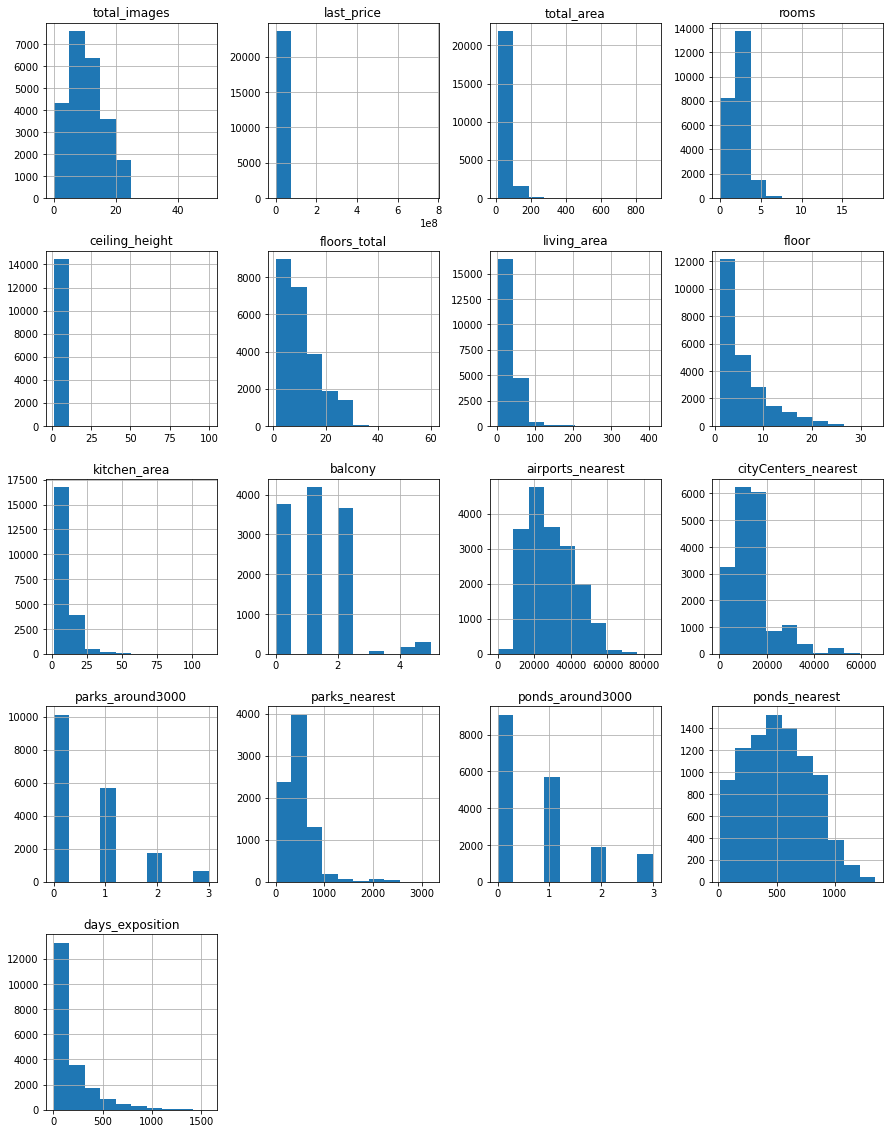

In [3]:
data.hist(figsize=(15, 20));

In [4]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [5]:
data = data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'})

In [6]:
data.duplicated().sum()

0

### Предобработка данных

#### Ищем пропущенные значения в столбцах

На этапе просмотра информации о датасете видим, что имеется 23699 строки с данными, при этом во многих местах есть пропуски, очень много пропусков в колонках с данными о том, является ли квартира апартаментами, о высоте потолка, о наличии балконов, о ближайших парках и водоёмах

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Видим, что в 88% объявлений не указано является ли помещение апартаментами, в 65% и в 61% не указано расстояние до парков и до водоёмов соответственно, в 38% объявлений не указана высота потолка, в 23% объявлений не указаны данные о расстоянии до аэропорта, до центра города, до парков в радиусе 3км, до водоёмов в радиусе 3км

#### Рассмотрим типы данных в каждом столбце

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [10]:
data['locality_name'] = data['locality_name'].astype('str')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Тип данных необходимо изменить для более удобной работы с данными. Столбец 'locality_name' нам пригодится, когда будем искать неявные дубликаты в названиях населенных пунктов, а столбец 'first_day_exposition' - когда будем доставать данные о днях недели

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. Создадим новый с названиями без дубликатов.

In [11]:
data['locality_name'].unique() #смотрим перечень уникальных названий населенных пунктов

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [12]:
len(data['locality_name'].unique()) #считаем количество уникальных названий населенных пунктов = 364

365

In [13]:
#используем стеммер для приведения всех названий к словарной форме
data['locality_name_changed'] = data['locality_name'].copy() #делаем столбец для изменения уже в нем названий
for i in range(len(data)):
    data.loc[i, 'locality_name_changed'] = russian_stemmer.stem(data['locality_name'][i]) #применяем стемминг


for i in range(len(data)):  #проверяем на наличие неявных дубликатов
    if 'поселок городского типа ' in data.loc[i, 'locality_name_changed']:
        data.loc[i, 'locality_name_changed'] = data.loc[i, 'locality_name_changed'].replace('поселок городского типа ', '')
    elif 'городской поселок ' in data.loc[i, 'locality_name_changed']:
        data.loc[i, 'locality_name_changed'] = data.loc[i, 'locality_name_changed'].replace('городской поселок ', '')
    elif 'деревня ' in data.loc[i, 'locality_name_changed']:
        data.loc[i, 'locality_name_changed'] = data.loc[i, 'locality_name_changed'].replace('деревня ', '')
    elif 'поселок ' in data.loc[i, 'locality_name_changed']:
        data.loc[i, 'locality_name_changed'] = data.loc[i, 'locality_name_changed'].replace('поселок ', '')

len(data['locality_name_changed'].unique()) #считаем количество уникальных названий населенных пунктов в новом столбце = 310

311

In [14]:
data['locality_name_changed'].unique()

array(['санкт-петербург', 'шушар', 'янино-1', 'парголов', 'мурин',
       'ломонос', 'сертолов', 'петергоф', 'пушкин', 'кудров', 'коммунар',
       'колпин', 'красный бор', 'гатчин', 'федоровск', 'выборг',
       'кронштадт', 'кировск', 'новое девяткин', 'металлостр', 'лебяж',
       'сиверск', 'молодцов', 'кузьмоловск',
       'садовое товарищество новая ропш', 'павловск', 'пикколов',
       'всеволожск', 'волх', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттуз', 'аннин', 'ефимовск', 'плодов', 'заклин', 'торкович',
       'первомайск', 'красное сел', 'понтон', 'сясьстр', 'стар',
       'лесколов', 'новый свет', 'сланц', 'село путилов', 'ивангород',
       'шлиссельбург', 'никольск', 'зеленогорск', 'сосновый бор', 'оржиц',
       'кальтин', 'романовк', 'бугр', 'рощин', 'кириш', 'луг', 'волосов',
       'отрадн', 'село павлов', 'оредеж', 'село копор', 'молодежн',
       'тихвин', 'побед', 'нурм', 'синявин', 'тосн', 'стрельн',
       'бокситогорск', 'александровск', 'лопухинк', 'пи

#### Найдём и устраним редкие и выбивающиеся значения.

In [15]:
data['balcony'] = data['balcony'].fillna(0) #заменяем пропуски в колонке с данными о балконах на 0


Пропуски в данных могли появиться из-за технического фактора (например, при переносе данных в таблицу), а также из-за человеческого фактора (хозяин квартиры мог пропустить какой-то пункт, мог забыть или попросту не знать, например, о расстоянии до аэропорта или ближайшего водоёма).

In [16]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['is_apartment'] = data['is_apartment'].fillna(False)

Заменяем пропуски в столбцах с количеством ближайших парков и водоёмов на ноль (так как скорее всего если число парков и водоёмов поблизости не указано, то их и нет), а в столбце апартаменты - на False, потому что апартаменты - не так часто встречающийся тип помещения, и если тип помещения - апартаменты, то на этом делают особый акцент

In [17]:
data.dropna(subset=['locality_name'], inplace=True) 
data.dropna(subset=['floors_total'], inplace=True)
data = data.reset_index(drop=True)

Пропуски в столбцах с названиями населённых пунктов и с этажностью здания составляют менее одного процента в каждом (0.206% и 0.363% соответственно), поэтому можем их удалить

Посчитаем коэффициенты отношения площади кухни и жилой площади к всей площади, а потом с их помощью заполним пропуски

In [18]:
living_to_total = (data['living_area'] / data['total_area']).mean()
living_to_total

0.5649479605594985

In [19]:
kitchen_to_total = (data['kitchen_area'] / data['total_area']).mean()
kitchen_to_total

0.18732402442071253

In [20]:
data['living_area'].fillna(living_to_total * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_to_total * data['total_area'], inplace=True)

Заполним данные о высоте потолка

In [21]:
ceiling_delete = 0 #создаём счётчик удалённых потолков
for i in range(len(data)):
    if data['ceiling_height'][i] >= 20:
        data.loc[i, 'ceiling_height'] = data.loc[i, 'ceiling_height'] // 10
    elif data['ceiling_height'][i] >= 6:
        data.loc[i, 'ceiling_height'] = data['ceiling_height'].median()
        ceiling_delete += 1
    elif data['ceiling_height'][i] < 2:
        data.loc[i, 'ceiling_height'] = data['ceiling_height'].median()
        ceiling_delete += 1
#если указанная высота потолков больше 20, то, скорее всего, это ошибка
#если высота потолков больше 6 метров или двух, то заменим это значение на 0, далее заменим их медианными значениями

ceiling_delete = ceiling_delete / len(data['ceiling_height']) #получили 11 значений
ceiling_delete #считаем сколько удалили значений в процентах = 0.00046%

0.0004234955321221361

In [22]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,14495.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,18081.000000,18104.000000,23613.000000,8045.000000,23613.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.726021,10.673824,34.571407,5.877313,10.568630,0.593063,28788.008185,14185.084015,0.468810,490.554630,0.590480,518.209469,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,0.284954,6.597173,22.340445,4.873539,6.095654,0.960307,12626.209956,8614.132292,0.748489,341.336698,0.884436,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13093.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [23]:
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'ceiling_height']
for row in list_features:
    data[row] = quartile_range(data, row)

In [24]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.156400e+04,22374.000000,23613.000000,13686.000000,23613.000000,22730.000000,23613.000000,22266.000000,23613.000000,18081.000000,18104.000000,23613.000000,8045.000000,23613.000000,9061.000000,20441.000000
mean,9.874518,4.839129e+06,54.346138,2.071147,2.680255,10.673824,31.514998,5.877313,9.463441,0.593063,28788.008185,14185.084015,0.468810,490.554630,0.590480,518.209469,180.884839
std,5.681541,2.217292e+06,19.349696,1.078380,0.184451,6.597173,13.752287,4.873539,3.176745,0.960307,12626.209956,8614.132292,0.748489,341.336698,0.884436,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.500000,5.000000,18.700000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.400000e+06,50.100000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13093.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.000000e+06,65.600000,3.000000,2.760000,16.000000,40.600000,8.000000,11.100000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,1.189440e+07,114.400000,19.000000,3.230000,60.000000,76.700000,33.000000,19.481699,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Посчитайте и добавьте в таблицу новые столбцы

In [25]:
data['price_for_sqr_m'] = data['last_price'] // data['total_area']

In [26]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday

In [27]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [28]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [29]:
def floors(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floors, axis=1)

In [30]:
data['city_centers_distance'] = round(data['city_centers_nearest'] / 1000)
data['city_centers_nearest']

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23608     4232.0
23609        NaN
23610        NaN
23611    10364.0
23612        NaN
Name: city_centers_nearest, Length: 23613, dtype: float64

In [31]:
data['city_centers_distance']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23608     4.0
23609     NaN
23610     NaN
23611    10.0
23612     NaN
Name: city_centers_distance, Length: 23613, dtype: float64

### Проведите исследовательский анализ данных

#### Изучим параметры квартир и построим гистограммы

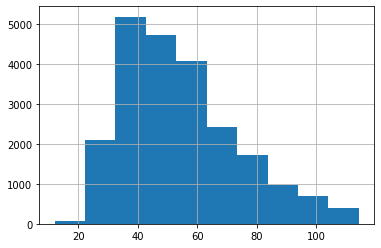

In [32]:
data['total_area'].hist();

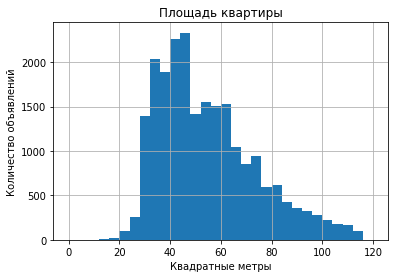

In [33]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['total_area'], bins = 30, range=(0, 120))
ax.set_title('Площадь квартиры')
ax.set_xlabel('Квадратные метры')
ax.set_ylabel('Количество объявлений')
plt.show()

Получили распределение Пуассона, видим, что самые популярные квартиры - с площадью от 30 до 70 кв.м.

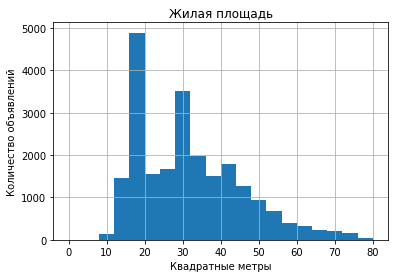

In [34]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['living_area'], bins = 20, range=(0, 80))
ax.set_title('Жилая площадь')
ax.set_xlabel('Квадратные метры')
ax.set_ylabel('Количество объявлений')
plt.show()

Чаще всего продаются квартиры от 15 до 50 кв.м.

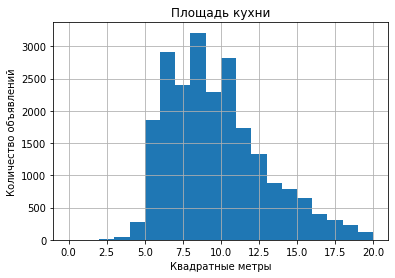

In [35]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['kitchen_area'], bins = 20, range=(0, 20))
ax.set_title('Площадь кухни')
ax.set_xlabel('Квадратные метры')
ax.set_ylabel('Количество объявлений')
plt.show()

Чаще всего в объявлениях указана площадь кухни от 5 до 15 кв.м.

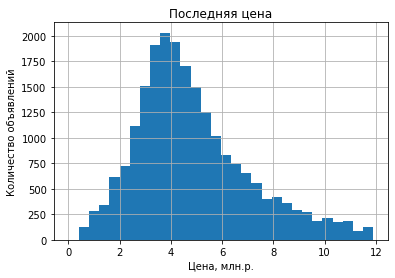

In [36]:
fig, ax = plt.subplots()
ax.grid()
ax.hist((data['last_price'] / 1000000), bins = 30)
ax.set_title('Последняя цена')
ax.set_xlabel('Цена, млн.р.')
ax.set_ylabel('Количество объявлений')
plt.show()

Чаще всего в объявлениях указана цена от 2 млн до 7 млн рублей.

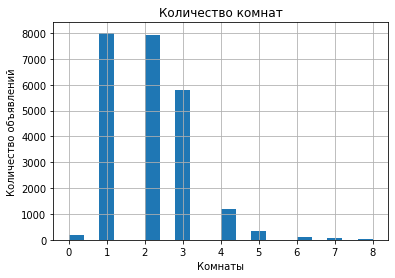

In [37]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['rooms'], bins = 20, range=(0,8))
ax.set_title('Количество комнат')
ax.set_xlabel('Комнаты')
ax.set_ylabel('Количество объявлений')
plt.show()

Больше всего продаётся однокомнатных и двухкомнатных квартир, чуть меньше трёхкомнатных

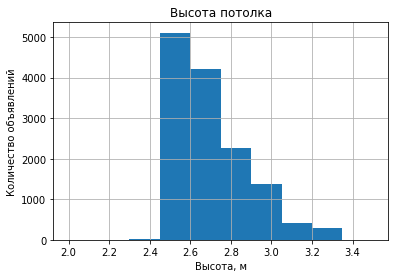

In [38]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['ceiling_height'], bins = 10, range=(2, 3.5))
ax.set_title('Высота потолка')
ax.set_xlabel('Высота, м')
ax.set_ylabel('Количество объявлений')
plt.show()

Чаще всего в объявлениях указана высота потолка от 2.5 м до 3 м

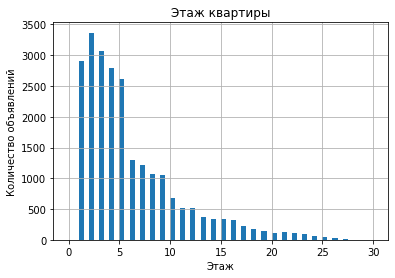

In [39]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['floor'], bins = 60, range=(0, 30))
ax.set_title('Этаж квартиры')
ax.set_xlabel('Этаж')
ax.set_ylabel('Количество объявлений')
plt.show()

Чаще всего продаются квартиры соответственно на втором, третьем, первом, четвёртом и пятом этажах

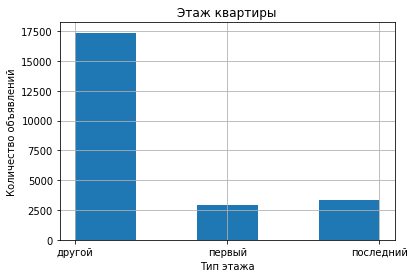

In [40]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['floor_type'], bins = 5)
ax.set_title('Этаж квартиры')
ax.set_xlabel('Тип этажа')
ax.set_ylabel('Количество объявлений')
plt.show()

Больше всего продаж у квартир не на первом и не на последнем этаже

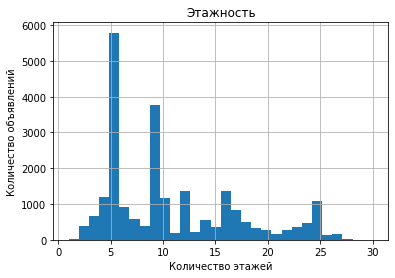

In [41]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['floors_total'], bins = 30, range=(1, 30))
ax.set_title('Этажность')
ax.set_xlabel('Количество этажей')
ax.set_ylabel('Количество объявлений')
plt.show()

Больше всего квартир продаётся в пятиэтажных и в девятиэтажных домах

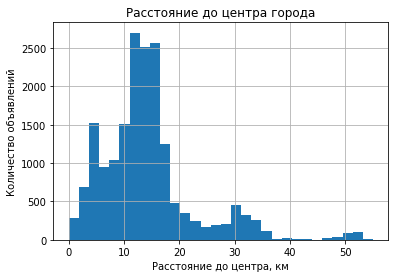

In [42]:
fig, ax = plt.subplots()
ax.grid()
ax.hist((data['city_centers_nearest'] / 1000), bins = 30, range=(0, 55))
ax.set_title('Расстояние до центра города')
ax.set_xlabel('Расстояние до центра, км')
ax.set_ylabel('Количество объявлений')
plt.show()

Чаще всего квартир находится от 10 до 18 км от центра города

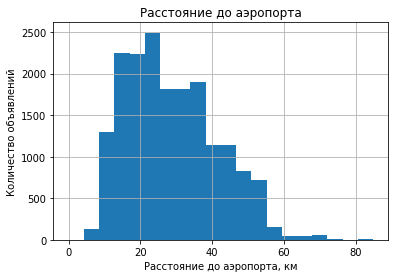

In [43]:
fig, ax = plt.subplots()
ax.grid()
ax.hist((data['airports_nearest'] / 1000), bins = 20)
ax.set_title('Расстояние до аэропорта')
ax.set_xlabel('Расстояние до аэропорта, км')
ax.set_ylabel('Количество объявлений')
plt.show()

Большинство квартир находятся на расстоянии от 10 до 45 км от аэропорта.

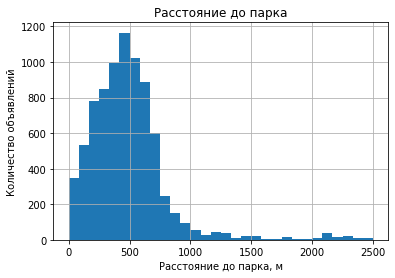

In [44]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['parks_nearest'], bins = 30, range=(0, 2500))
ax.set_title('Расстояние до парка')
ax.set_xlabel('Расстояние до парка, м')
ax.set_ylabel('Количество объявлений')
plt.show()

У большинства квартир из объявлений ближайший парк находится в пределах одного километра

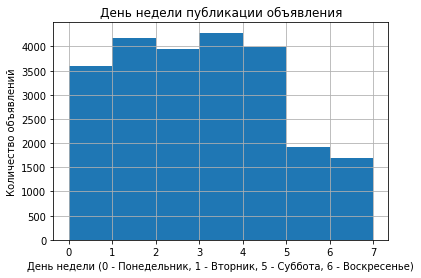

In [45]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['day_of_week_exposition'], bins = 7, range=(0,7))
ax.set_title('День недели публикации объявления')
ax.set_xlabel('День недели (0 - Понедельник, 1 - Вторник, 5 - Суббота, 6 - Воскресенье)')
ax.set_ylabel('Количество объявлений')
plt.show()

По будням выкладывают больше объявлений, чем по выходным

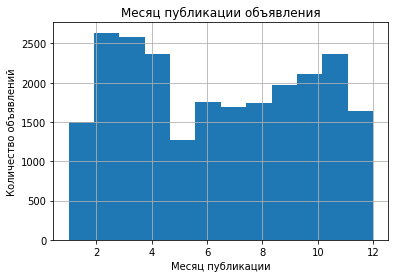

In [46]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['month_exposition'], bins = 12)
ax.set_title('Месяц публикации объявления')
ax.set_xlabel('Месяц публикации')
ax.set_ylabel('Количество объявлений')
plt.show()

Меньше всего объявлений выкладывают в мае, январе и декабре

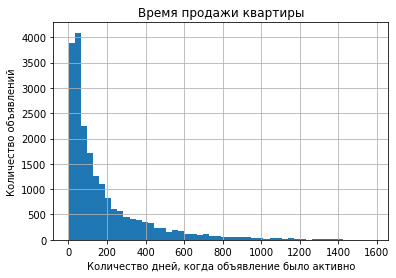

In [47]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['days_exposition'], bins = 50)
ax.set_title('Время продажи квартиры')
ax.set_xlabel('Количество дней, когда объявление было активно')
ax.set_ylabel('Количество объявлений')
plt.show()

Вывод: чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

#### Изучим, как быстро продавались квартиры

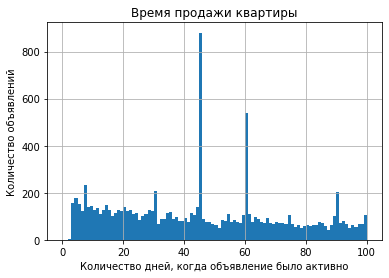

In [48]:
fig, ax = plt.subplots()
ax.grid()
ax.hist(data['days_exposition'], bins = 100, range=(0,100))
ax.set_title('Время продажи квартиры')
ax.set_xlabel('Количество дней, когда объявление было активно')
ax.set_ylabel('Количество объявлений')
plt.show()

Видим пики (выбросы) где 7, 30, 45, 60 и 90 дней. Возможно, через такое количество дней объявления автоматически становятся неактивными.

In [49]:
data['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [50]:
data['days_exposition'].mean()

180.88483929357665

Средний срок, за который продаётся квартира - 180 дней (полгода), а медианный - 95 (чуть больше чем три месяца). Это означает, что половина всех квартир продаётся за три месяца или быстрее, а другая половина - за более чем три месяца. При этом по некоторым объявлениям срок продажи может достигать четырёх лет.

Если объявление было размещено 45 дней или менее, то можно считать продажу быстрой, если 231 день или дольше - очень долгой

#### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта

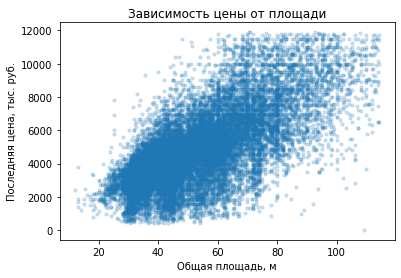

In [51]:
data['last_price'] = data['last_price'] / 1000
data.plot.scatter(x='total_area', y='last_price', s = 10, alpha = 0.2, 
                  xlabel='Общая площадь, м', ylabel='Последняя цена, тыс. руб.', title='Зависимость цены от площади');
data['last_price'] = data['last_price'] * 1000

In [52]:
data.pivot_table(index='floor', values=['total_area', 'last_price']).corr()

,last_price,total_area
last_price,1.000000,0.905269
total_area,0.905269,1.000000


Корреляция цены и площади очень высокая, и по графику видно, что чем больше площадь, тем больше цена

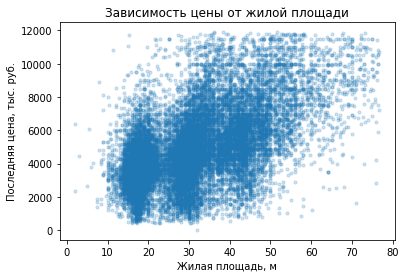

In [53]:
data['last_price'] = data['last_price'] / 1000
data.plot.scatter(x='living_area', y='last_price', s = 10, alpha = 0.2, 
                  xlabel='Жилая площадь, м', ylabel='Последняя цена, тыс. руб.', title='Зависимость цены от жилой площади');
data['last_price'] = data['last_price'] * 1000

In [54]:
data.pivot_table(index='floor', values=['living_area', 'last_price']).corr()

,last_price,living_area
last_price,1.000000,0.730176
living_area,0.730176,1.000000


Корреляция цены и жилой площади высокая, видна зависимость цены от жилой площади, хоть и не такая явная, как от общей площади

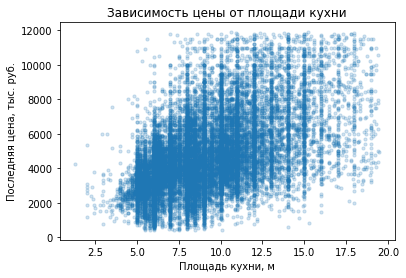

In [55]:
data['last_price'] = data['last_price'] / 1000
data.plot.scatter(x='kitchen_area', y='last_price', s = 10, alpha = 0.2, 
                  xlabel='Площадь кухни, м', ylabel='Последняя цена, тыс. руб.', title='Зависимость цены от площади кухни');
data['last_price'] = data['last_price'] * 1000

In [56]:
data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr()

,kitchen_area,last_price
kitchen_area,1.00000,0.44128
last_price,0.44128,1.00000


В квартирах на одном этаже корреляция цены и площади кухни невысокая, видна зависимость цены от площади кухни, но не всегда, на каждое значение площади кухни есть много разных значений цены.

In [57]:
data['last_price'] = data['last_price'] / 1000000

Переведём значения цены из рублей в миллионы рублей

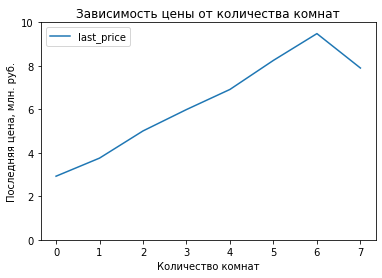

In [58]:
price_floor = data.pivot_table(index='rooms', values='last_price')
price_floor.plot(ylim=(0, 10), xlabel='Количество комнат', ylabel='Последняя цена, млн. руб.', title='Зависимость цены от количества комнат');

Зависимость цены от количества квартир прямо пропорциональная, чем больше комнат, тем больше цена вплоть до шести комнат, при семи комнатах средняя цена немного ниже

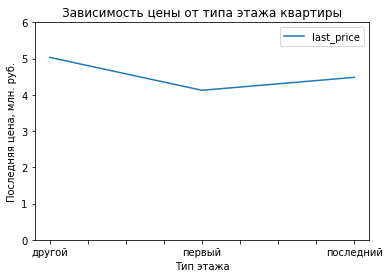

In [59]:
price_floor = data.pivot_table(index='floor_type', values='last_price')
price_floor.plot(ylim=(0, 6), xlabel='Тип этажа', ylabel='Последняя цена, млн. руб.', title='Зависимость цены от типа этажа квартиры');

Цена на квартиры на первом этаже меньше, чем на остальные квартиры

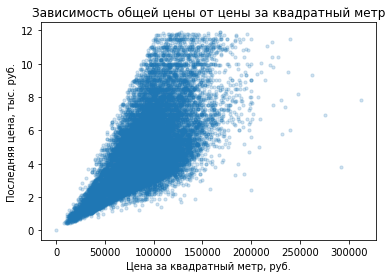

In [60]:
data.plot.scatter(x='price_for_sqr_m', y='last_price', s = 10, alpha = 0.2, 
                  xlabel='Цена за квадратный метр, руб.', ylabel='Последняя цена, тыс. руб.', title='Зависимость общей цены от цены за квадратный метр');

Зависимость цены на квартиру от цены за квадратный метр большая

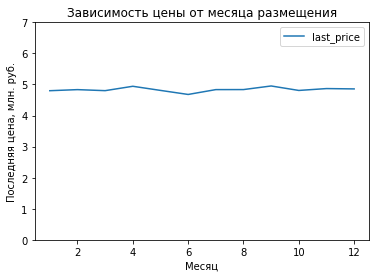

In [61]:
price_floor = data.pivot_table(index='month_exposition', values='last_price')
price_floor.plot(ylim=(0, 7), xlabel='Месяц', ylabel='Последняя цена, млн. руб.', title='Зависимость цены от месяца размещения');

In [62]:
data.pivot_table(index='month_exposition', values=['price_for_sqr_m', 'last_price', 'total_area'])

,last_price,price_for_sqr_m,total_area
month_exposition,,,
1,4.799730,91785.508915,54.238982
2,4.834506,91551.050230,54.338708
3,4.801455,92166.226439,54.134994
4,4.942300,93750.707363,54.627731
5,4.809500,91878.605585,53.879672
6,4.679061,89611.326851,53.811906
7,4.835079,92124.593544,54.266248
8,4.836221,92970.907021,53.897759
9,4.952202,93209.930469,54.854445


Зависимость цены от месяца размещения небольшая

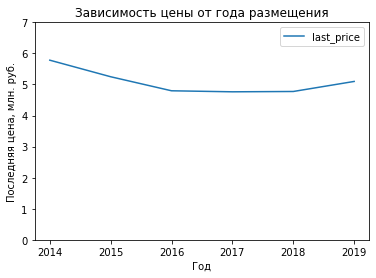

In [63]:
price_floor = data.pivot_table(index='year_exposition', values='last_price')
price_floor.plot(ylim=(0, 7), xlabel='Год', ylabel='Последняя цена, млн. руб.', title='Зависимость цены от года размещения');

In [64]:
data.pivot_table(index='year_exposition', values=['price_for_sqr_m', 'last_price', 'total_area'])

,last_price,price_for_sqr_m,total_area
year_exposition,,,
2014,5.782435,95784.034884,65.833365
2015,5.249180,90897.104839,59.703296
2016,4.797301,89493.747561,55.064963
2017,4.764220,90247.296426,54.375112
2018,4.774671,92317.407809,53.402734
2019,5.098105,98987.757611,53.888890


Хотя судя по графику кажется, что цены падали до 2018 года, а в 2019 немного начали расти, по сводной таблице видим, что всё дело в том, что до 2016 года падала цена за квадратный метр, а с 2017 начала расти, причем в 2019 выросла очень резко, и несмотря на то, что средняя площадь продаваемых квартир падает из года в год, общая цена с 2017 по 2019 растёт

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [65]:
data['locality_name_changed'].value_counts().head(10)

санкт-петербург    15651
мурин                586
кудров               470
шушар                439
всеволожск           398
пушкин               369
колпин               338
парголов             327
гатчин               307
выборг               237
Name: locality_name_changed, dtype: int64

In [66]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Порядок первых 10 населённых пунктов с наибольшим числом объявлений в изменённом столбце не совпадает с первоначальным столбцом, поэтому будем использовать столбец 'locality_name_changed'

In [67]:
data['locality_name_changed'].value_counts().head(10)

санкт-петербург    15651
мурин                586
кудров               470
шушар                439
всеволожск           398
пушкин               369
колпин               338
парголов             327
гатчин               307
выборг               237
Name: locality_name_changed, dtype: int64

In [68]:
price_for_sqr_m = (
    data.pivot_table(index='locality_name_changed', values='price_for_sqr_m', aggfunc=['count', 'mean'])
    #делаем сводную таблицу со значениями цены за квадратный метр, считаем сколько объявлений по каждому населённому пункту и
    #находим среднюю цену за квадратный метр
    .rename(columns={'count':'Всего объявлений', 'mean':'Средняя цена за кв.м.'}).droplevel(1,axis=1)
    #переименовываем столбцы 

).sort_values(by='Всего объявлений', ascending=False).head(10) #сортируем по количеству объявлений
price_for_sqr_m


,Всего объявлений,Средняя цена за кв.м.
locality_name_changed,,
санкт-петербург,13550,105696.441328
мурин,586,86040.655290
кудров,468,95086.508547
шушар,436,78577.607798
всеволожск,394,67221.964467
пушкин,336,100461.616071
колпин,335,75221.441791
парголов,326,90331.837423
гатчин,303,68663.584158


In [69]:
price_for_sqr_m.sort_values(by='Средняя цена за кв.м.', ascending=False) #сортируем по средней цене за кв.м.

,Всего объявлений,Средняя цена за кв.м.
locality_name_changed,,
санкт-петербург,13550,105696.441328
пушкин,336,100461.616071
кудров,468,95086.508547
парголов,326,90331.837423
мурин,586,86040.655290
шушар,436,78577.607798
колпин,335,75221.441791
гатчин,303,68663.584158
всеволожск,394,67221.964467


Самые высокие цены на жильё за квадратный метр (среди 10 населённых пунктов с наибольшим числом объявлений) в Санкт-Петербурге. Пушкине и Кудрово. Самые низкие цены - в Гатчине, Всеволожске и Выборге

#### Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра

In [70]:
saint_p = data.query('locality_name == "Санкт-Петербург"')
saint_p

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed,price_for_sqr_m,day_of_week_exposition,month_exposition,year_exposition,floor_type,city_centers_distance
0,20,NaN,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,санкт-петербург,NaN,3,3,2019,другой,16.0
2,10,5.196,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,...,2.0,574.0,558.0,санкт-петербург,92785.0,3,8,2015,другой,14.0
3,0,NaN,NaN,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,санкт-петербург,NaN,4,7,2015,другой,7.0
4,2,10.000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,санкт-петербург,100000.0,1,6,2018,другой,8.0
7,5,7.915,71.60,2019-04-18,2,NaN,24.0,40.450274,22,False,...,0.0,NaN,NaN,санкт-петербург,110544.0,3,4,2019,другой,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23603,13,3.550,35.30,2018-02-28,1,2.86,15.0,16.300000,4,False,...,2.0,652.0,29.0,санкт-петербург,100566.0,2,2,2018,другой,16.0
23604,3,5.500,52.00,2018-07-19,2,NaN,5.0,31.000000,2,False,...,0.0,NaN,15.0,санкт-петербург,105769.0,3,7,2018,другой,6.0
23605,11,9.470,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,1.0,806.0,519.0,санкт-петербург,129903.0,3,10,2016,другой,4.0
23608,9,9.700,NaN,2017-03-21,3,NaN,5.0,73.300000,3,False,...,3.0,381.0,NaN,санкт-петербург,NaN,1,3,2017,другой,4.0


In [71]:
saint_p.pivot_table(index='city_centers_distance', values=['last_price', 'price_for_sqr_m'], aggfunc='mean')

,last_price,price_for_sqr_m
city_centers_distance,,
0.0,8.398000,119157.500000
1.0,8.145277,122075.915789
2.0,7.970519,116426.911243
3.0,7.350003,110201.936441
4.0,7.606618,116456.390300
5.0,7.661225,121135.024433
6.0,7.108234,122721.997519
7.0,6.635321,116559.536842
8.0,6.602576,115926.241379


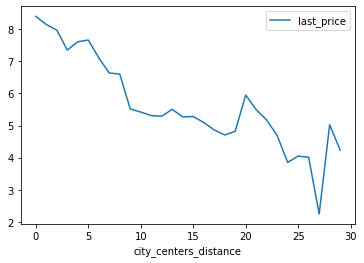

In [72]:
saint_p.pivot_table(index='city_centers_distance', values='last_price', aggfunc='mean').plot();

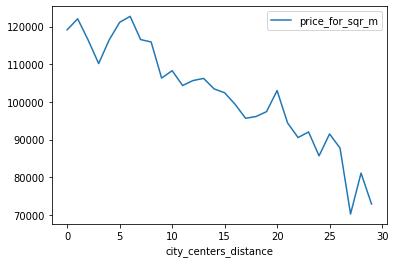

In [73]:
saint_p.pivot_table(index='city_centers_distance', values='price_for_sqr_m', aggfunc='mean').plot();

Самые дорогие квартиры в центре города, чем дальше от центра - тем дешевле, и обшая цена, и цена за квадратный метр

Видим пик в районе 27 километров. Загуглив, я выяснил, что расстояние от Санкт-Петербурга до Всеволожска на машине 27 км. Таким образом, возможно следует изменить название населённого пункта у квартир, у которых расстояние от центра Санкт-Петербурга от 27 до 30 км с Санкт-Петербурга на Всеволожск

In [74]:
data.query('city_centers_distance > 27 & locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed,price_for_sqr_m,day_of_week_exposition,month_exposition,year_exposition,floor_type,city_centers_distance
810,0,7.600,111.0,2017-07-26,3,3.00,16.0,63.0,12,False,...,2.0,72.0,66.0,санкт-петербург,68468.0,2,7,2017,другой,28.0
1107,0,4.072,38.0,2015-10-14,1,NaN,5.0,16.0,4,False,...,0.0,NaN,285.0,санкт-петербург,107157.0,2,10,2015,другой,28.0
9541,0,3.413,43.0,2015-11-10,1,NaN,5.0,18.0,1,False,...,0.0,NaN,258.0,санкт-петербург,79372.0,1,11,2015,первый,28.0
10755,10,4.850,62.0,2017-05-16,3,NaN,5.0,35.7,1,False,...,0.0,NaN,63.0,санкт-петербург,78225.0,1,5,2017,первый,29.0
11602,16,4.700,51.0,2016-06-07,2,2.60,5.0,30.0,1,False,...,0.0,NaN,539.0,санкт-петербург,92156.0,1,6,2016,первый,29.0
12109,8,2.450,43.0,2018-08-14,1,2.75,5.0,16.0,1,True,...,0.0,NaN,8.0,санкт-петербург,56976.0,1,8,2018,первый,29.0
12977,16,4.200,56.8,2018-07-04,2,NaN,3.0,27.9,1,False,...,0.0,NaN,187.0,санкт-петербург,73943.0,2,7,2018,первый,29.0
16720,20,4.850,85.8,2019-04-22,3,NaN,3.0,49.4,2,False,...,0.0,NaN,NaN,санкт-петербург,56526.0,0,4,2019,другой,29.0
17728,0,4.990,71.0,2015-10-14,3,NaN,5.0,42.0,1,False,...,0.0,NaN,285.0,санкт-петербург,70281.0,2,10,2015,первый,28.0
18869,0,3.666,39.0,2015-11-09,1,NaN,5.0,16.0,2,False,...,0.0,NaN,259.0,санкт-петербург,94000.0,0,11,2015,другой,28.0


### Общий вывод

#### Срок продажи квартиры

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

#### Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

#### Стоимость квадратного метра в топ-10 населённых пунктов

Дороже всего квадратный метр в Санкт-Петербурге - 114848
Дешевле всего квадратный метр в Выборге - 58141

Была проведена работа по предобработке данных, устранению неявных дубликатов, подсчёту дополнительных метрик. Выяснили, в каких населённых пунктах наибольшее количество объявлений квартир, и какая у этих квартир цена за квадратный метр. Узнали, что самое дорогое жильё - в Санкт-Петербурге, при этом чем ближе к центру города - тем дороже.